# Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_produksi = pd.read_excel('RawDataProduksi_NovDes.xlsx')
raw_event = pd.read_excel('RawDataEvent_NovDes.xlsx')

In [3]:
pd.set_option('max_columns', None)
raw_produksi.head(5)

,ActualProdID,ProdDate,ShiftID,SupervisorID,SupervisorName,ForemanID,ForemanName,LoadingEq,LoaderModel,LoaderOperatorID,LoaderOperatorSN,LoaderOperatorName,LoadingPointID,LoadingPointName,Material,MaterialDesc,production,ProductionUOM,ServiceID,SpareOpt,HaulingEq,HaulingModel,HaulerOperatorID,HaulerOperatorSN,HaulerOperatorName,distance,Rit0607,Rit0708,Rit0809,Rit0910,Rit1011,Rit1112,Rit1213,Rit1314,Rit1415,Rit1516,Rit1617,Rit1718,Rit1819,Rit1920,Rit2021,Rit2122,Rit2223,Rit2300,Rit0001,Rit0102,Rit0203,Rit0304,Rit0405,Rit0506,Ritation,Capacity,Ton,MeasuredTon,location,DumpingLocation,remarks,remarks2,actualTon,SpareOptHauling,Remarks3,Grade
0,A-BMB-TPN01112020-DS,2020-11-01,DS,947,RAHMADI WIDODO,NaN,REZA HABIBI,CE7136,6030-BH,15985,53421,SOALA ROHA SIMAREMARE,33525,PIT SITARUM,3,OVERBURDEN - RIPPING,10280,BCM,OB,NaN,CO4365,777D,16456,59284,HENDRA GUNAWAN,2300,0,3,0,1,0,4,3,0,2,3,3,4,3,0,0,0,0,0,0,0,0,0,0,0,26,40,1040,NaN,33530,IPD CBM,NaN,NaN,1040,NaN,SITARUM UTARA,8.0
1,A-BMB-TPN01112020-DS,2020-11-01,DS,947,RAHMADI WIDODO,NaN,REZA HABIBI,CE7136,6030-BH,15985,53421,SOALA ROHA SIMAREMARE,33525,PIT SITARUM,3,OVERBURDEN - RIPPING,10280,BCM,OB,NaN,CO4348,777D,16367,52715,RICY GOBEL,2300,0,4,1,1,4,4,4,0,2,4,2,4,3,0,0,0,0,0,0,0,0,0,0,0,33,40,1320,NaN,33530,IPD CBM,NaN,NaN,1320,NaN,SITARUM UTARA,8.0
2,A-BMB-TPN01112020-DS,2020-11-01,DS,947,RAHMADI WIDODO,NaN,REZA HABIBI,CE7136,6030-BH,15985,53421,SOALA ROHA SIMAREMARE,33525,PIT SITARUM,3,OVERBURDEN - RIPPING,10280,BCM,OB,NaN,CO066,777D,16350,52701,HENDRI IRAWAN,2300,0,4,0,1,5,4,4,0,2,3,2,4,3,0,0,0,0,0,0,0,0,0,0,0,32,40,1280,NaN,33530,IPD CBM,NaN,NaN,1280,NaN,SITARUM UTARA,8.0
3,A-BMB-TPN01112020-DS,2020-11-01,DS,947,RAHMADI WIDODO,NaN,REZA HABIBI,CE7136,6030-BH,15985,53421,SOALA ROHA SIMAREMARE,33525,PIT SITARUM,3,OVERBURDEN - RIPPING,10280,BCM,OB,NaN,CO4370,777D,16518,53039,AS'ARI,2300,0,4,0,1,4,5,4,0,2,4,3,3,3,0,0,0,0,0,0,0,0,0,0,0,33,40,1320,NaN,33530,IPD CBM,NaN,NaN,1320,NaN,SITARUM UTARA,8.0
4,A-BMB-TPN01112020-DS,2020-11-01,DS,947,RAHMADI WIDODO,NaN,REZA HABIBI,CE7136,6030-BH,15985,53421,SOALA ROHA SIMAREMARE,33525,PIT SITARUM,3,OVERBURDEN - RIPPING,10280,BCM,OB,NaN,CO4352,777D,16477,59458,MUHAMMAD ASNANI,2300,0,0,0,1,4,4,4,0,2,4,3,4,4,0,0,0,0,0,0,0,0,0,0,0,30,40,1200,NaN,33530,IPD CBM,NaN,NaN,1200,NaN,SITARUM UTARA,8.0


In [4]:
raw_event.head(5)

,ProjectID,ProdDate,ShiftID,Service,EquipmentID,SerialNumber,EquipmentModel,SMUStart,SMUEnd,TotalSMU,SMUInitial,SMUFinal,SMUDifference,StartTime,EndTime,Status,Reason,TimeDuration,EventDetailRemarks,EquipmentRemarks,OperatorSN,OperatorName,ActualProdID
0,BMB-TPN,2020-11-01,DS,OB,XCC1020,RK800365,CS11GC,1612.1,1614.5,2.4,1612.1,1612.1,0.0,07:00:00,14:00:00,3 - STANDBY,314 - AVAILABLE NOT REQUIRED,7.0,NaN,NaN,52412,AGUS WIYONO,A-BMB-TPN11012020-DS
1,BMB-TPN,2020-11-01,DS,OB,XCC1020,RK800365,CS11GC,1612.1,1614.5,2.4,1612.1,1614.5,2.4,14:00:00,16:24:00,2 - IDLE/DELAY,201 - GENERAL SUPPORT WORK,2.4,NaN,NaN,52412,AGUS WIYONO,A-BMB-TPN11012020-DS
2,BMB-TPN,2020-11-01,DS,OB,XCC1020,RK800365,CS11GC,1612.1,1614.5,2.4,1614.5,1614.5,0.0,16:24:00,19:00:00,3 - STANDBY,314 - AVAILABLE NOT REQUIRED,2.6,NaN,NaN,52412,AGUS WIYONO,A-BMB-TPN11012020-DS
3,BMB-TPN,2020-11-01,DS,OB,XCC1026,TJL06528,CS-533E,3847.7,3847.7,0.0,3847.7,3847.7,0.0,07:00:00,19:00:00,4 - DOWN,403 - HYDRAULIC SYSTEM,12.0,"Warning hyd on, Hyd Lock",NaN,NaN,NaN,A-BMB-TPN11012020-DS
4,BMB-TPN,2020-11-01,DS,OB,CD142,0WDM02579,D9R,21627.0,21627.0,0.0,21627.0,21627.0,0.0,07:00:00,17:54:00,4 - DOWN,416 - AC,10.9,AC get Hot,NaN,NaN,NaN,A-BMB-TPN11012020-DS


# Data Cleaning

## Data Produksi

In [5]:
pd.set_option('max_rows', None)
raw_produksi.nunique(axis=0)

ActualProdID          290
ProdDate               61
ShiftID                 2
SupervisorID            4
SupervisorName          4
ForemanID               5
ForemanName             7
LoadingEq              31
LoaderModel             8
LoaderOperatorID       98
LoaderOperatorSN      115
LoaderOperatorName    115
LoadingPointID          8
LoadingPointName        4
Material                6
MaterialDesc            6
production            990
ProductionUOM           2
ServiceID               2
SpareOpt                0
HaulingEq              86
HaulingModel            5
HaulerOperatorID      215
HaulerOperatorSN      230
HaulerOperatorName    226
distance               76
Rit0607                12
Rit0708                11
Rit0809                11
Rit0910                13
Rit1011                11
Rit1112                14
Rit1213                14
Rit1314                13
Rit1415                13
Rit1516                15
Rit1617                13
Rit1718                13
Rit1819     

Kolom SpareOpt, MeasuredTon dan SpareOptHauling tidak memiliki data, sementara kolom Grade hanya memiliki 1 data unik. Data seperti ini dapat dibuang. Dua kolom atau lebih yang memiliki informasi sama sebaiknya hanya diambil 1 kolom saja yang mewakili seluruh data. Seperti SupervisorID dengan SupervisorName, ForemanID dengan ForemanName dan sebagainya. Data yang diambil dapat berupa ID atau Nama bergantung pada kebutuhan data, dalam kasus ini dipilih ID untuk mewakili data sejenis. Dengan begitu storage yang digunakan dapat menjadi lebih kecil dan perekaman data menjadi lebih cepat

In [6]:
drop = ['ActualProdID','MeasuredTon','SpareOptHauling','Grade','SupervisorName',
        'ForemanName','LoaderOperatorSN','LoaderOperatorName','LoadingPointName',
        'Material','ServiceID','SpareOpt','HaulerOperatorSN','HaulerOperatorName']

In [7]:
produksi_dropped = raw_produksi.drop(drop, axis=1)
produksi_dropped.head(5)

,ProdDate,ShiftID,SupervisorID,ForemanID,LoadingEq,LoaderModel,LoaderOperatorID,LoadingPointID,MaterialDesc,production,ProductionUOM,HaulingEq,HaulingModel,HaulerOperatorID,distance,Rit0607,Rit0708,Rit0809,Rit0910,Rit1011,Rit1112,Rit1213,Rit1314,Rit1415,Rit1516,Rit1617,Rit1718,Rit1819,Rit1920,Rit2021,Rit2122,Rit2223,Rit2300,Rit0001,Rit0102,Rit0203,Rit0304,Rit0405,Rit0506,Ritation,Capacity,Ton,location,DumpingLocation,remarks,remarks2,actualTon,Remarks3
0,2020-11-01,DS,947,NaN,CE7136,6030-BH,15985,33525,OVERBURDEN - RIPPING,10280,BCM,CO4365,777D,16456,2300,0,3,0,1,0,4,3,0,2,3,3,4,3,0,0,0,0,0,0,0,0,0,0,0,26,40,1040,33530,IPD CBM,NaN,NaN,1040,SITARUM UTARA
1,2020-11-01,DS,947,NaN,CE7136,6030-BH,15985,33525,OVERBURDEN - RIPPING,10280,BCM,CO4348,777D,16367,2300,0,4,1,1,4,4,4,0,2,4,2,4,3,0,0,0,0,0,0,0,0,0,0,0,33,40,1320,33530,IPD CBM,NaN,NaN,1320,SITARUM UTARA
2,2020-11-01,DS,947,NaN,CE7136,6030-BH,15985,33525,OVERBURDEN - RIPPING,10280,BCM,CO066,777D,16350,2300,0,4,0,1,5,4,4,0,2,3,2,4,3,0,0,0,0,0,0,0,0,0,0,0,32,40,1280,33530,IPD CBM,NaN,NaN,1280,SITARUM UTARA
3,2020-11-01,DS,947,NaN,CE7136,6030-BH,15985,33525,OVERBURDEN - RIPPING,10280,BCM,CO4370,777D,16518,2300,0,4,0,1,4,5,4,0,2,4,3,3,3,0,0,0,0,0,0,0,0,0,0,0,33,40,1320,33530,IPD CBM,NaN,NaN,1320,SITARUM UTARA
4,2020-11-01,DS,947,NaN,CE7136,6030-BH,15985,33525,OVERBURDEN - RIPPING,10280,BCM,CO4352,777D,16477,2300,0,0,0,1,4,4,4,0,2,4,3,4,4,0,0,0,0,0,0,0,0,0,0,0,30,40,1200,33530,IPD CBM,NaN,NaN,1200,SITARUM UTARA


In [8]:
produksi_dropped.isna().sum()

ProdDate                0
ShiftID                 0
SupervisorID            0
ForemanID            7085
LoadingEq               0
LoaderModel             0
LoaderOperatorID        0
LoadingPointID          0
MaterialDesc            0
production              0
ProductionUOM           0
HaulingEq               0
HaulingModel            0
HaulerOperatorID        0
distance                0
Rit0607                 0
Rit0708                 0
Rit0809                 0
Rit0910                 0
Rit1011                 0
Rit1112                 0
Rit1213                 0
Rit1314                 0
Rit1415                 0
Rit1516                 0
Rit1617                 0
Rit1718                 0
Rit1819                 0
Rit1920                 0
Rit2021                 0
Rit2122                 0
Rit2223                 0
Rit2300                 0
Rit0001                 0
Rit0102                 0
Rit0203                 0
Rit0304                 0
Rit0405                 0
Rit0506     

Terdapat banyak data kosong (NaN) pada kolom ForemanID, remarks, remarks2 dan remarks3. Untuk data remarks wajar memiliki data kosong karena tidak setiap saat data ini diisi. Sementara data kosong ForemanID dapat terjadi ketika individu yang dimaksud belum memilki ID sehingga dibiarkan kosong. Namun pada penelitian ini dapat diabaikan karena variabel subjektif tidak akan dimasukkan dalam analisis.

## Data Event

In [9]:
raw_event.nunique(axis=0)

ProjectID                 1
ProdDate                 61
ShiftID                   2
Service                   2
EquipmentID             170
SerialNumber            163
EquipmentModel           25
SMUStart              16333
SMUEnd                16249
TotalSMU                121
SMUInitial            47717
SMUFinal              47717
SMUDifference            92
StartTime               242
EndTime                 242
Status                    4
Reason                   87
TimeDuration            121
EventDetailRemarks     2768
EquipmentRemarks          2
OperatorSN              450
OperatorName            446
ActualProdID            122
dtype: int64

Dengan melihat jumlah data unik dari masing-masing kolom, dapat dilihat bahwa data "ProjectID" tidak diperlukan karena hanya memiliki 1 data unik. Dua kolom atau lebih yang memiliki informasi sama sebaiknya hanya diambil 1 kolom saja yang mewakili seluruh data. Seperti EquipmentID dengan SerialNumber, OperatorSN dan OperatorName, dan sebagainya.

In [10]:
drop = ['ProjectID','SerialNumber','OperatorName']

In [11]:
raw_event.isna().sum()

ProjectID                  0
ProdDate                   0
ShiftID                    0
Service                    0
EquipmentID                0
SerialNumber               0
EquipmentModel             0
SMUStart                   0
SMUEnd                     0
TotalSMU                   0
SMUInitial                 0
SMUFinal                   0
SMUDifference              0
StartTime                  0
EndTime                    0
Status                     0
Reason                     0
TimeDuration               0
EventDetailRemarks    105040
EquipmentRemarks      120764
OperatorSN              6158
OperatorName            6158
ActualProdID               0
dtype: int64

Kolom EventDetailRemarks, EquipmentRemarks, OperatorSN dan OperatorName memiliki banyak data kosong, pada penelitian ini data tersebut akan dikeluarkan saja dari analisis. Kolom ActualProdID mewakili index timeframe dari 1 November hingga 31 Desember, tapi kita lebih sudah punya data ProdDate dan ShiftID yang mewakili timeframe. sehingga data yang akan drop yaitu:

In [12]:
drop = ['ProjectID','SerialNumber','EventDetailRemarks','EquipmentRemarks','OperatorSN','OperatorName','ActualProdID']

In [13]:
event_dropped = raw_event.drop(drop, axis=1)
event_dropped.head(5)

,ProdDate,ShiftID,Service,EquipmentID,EquipmentModel,SMUStart,SMUEnd,TotalSMU,SMUInitial,SMUFinal,SMUDifference,StartTime,EndTime,Status,Reason,TimeDuration
0,2020-11-01,DS,OB,XCC1020,CS11GC,1612.1,1614.5,2.4,1612.1,1612.1,0.0,07:00:00,14:00:00,3 - STANDBY,314 - AVAILABLE NOT REQUIRED,7.0
1,2020-11-01,DS,OB,XCC1020,CS11GC,1612.1,1614.5,2.4,1612.1,1614.5,2.4,14:00:00,16:24:00,2 - IDLE/DELAY,201 - GENERAL SUPPORT WORK,2.4
2,2020-11-01,DS,OB,XCC1020,CS11GC,1612.1,1614.5,2.4,1614.5,1614.5,0.0,16:24:00,19:00:00,3 - STANDBY,314 - AVAILABLE NOT REQUIRED,2.6
3,2020-11-01,DS,OB,XCC1026,CS-533E,3847.7,3847.7,0.0,3847.7,3847.7,0.0,07:00:00,19:00:00,4 - DOWN,403 - HYDRAULIC SYSTEM,12.0
4,2020-11-01,DS,OB,CD142,D9R,21627.0,21627.0,0.0,21627.0,21627.0,0.0,07:00:00,17:54:00,4 - DOWN,416 - AC,10.9


# Data Selection and Data Transformation

In [14]:
selected_columns = ['HaulingEq','Date','Shift','Material','Distance','Ritation','Capacity',
                    'HaulDuration1','HaulDuration2','HaulDuration3','HaulDuration4',
                    'Production']

In [15]:
haul_id = produksi_dropped['HaulingEq'].unique()
dates = produksi_dropped['ProdDate'].unique()
shifts = produksi_dropped['ShiftID'].unique()
status = event_dropped['Status'].unique()
status.sort()

In [16]:
arr = np.empty((0,12))

In [17]:
for hauler in haul_id:
    for date in dates:
        for shift in shifts:
            try:
                material = produksi_dropped[(produksi_dropped['HaulingEq']==hauler)&
                                            (produksi_dropped['ProdDate']==date)&
                                            (produksi_dropped['ShiftID']==shift)]['MaterialDesc'].iloc[0]
            except IndexError:
                material = np.nan
            try:
                capacity = produksi_dropped[(produksi_dropped['HaulingEq']==hauler)&
                                            (produksi_dropped['ProdDate']==date)&
                                            (produksi_dropped['ShiftID']==shift)]['Capacity'].iloc[0]
            except IndexError:
                capacity = np.nan
            
            distance = produksi_dropped[(produksi_dropped['HaulingEq']==hauler)&
                                      (produksi_dropped['ProdDate']==date)&
                                      (produksi_dropped['ShiftID']==shift)]['distance'].unique().sum()
            ritation = produksi_dropped[(produksi_dropped['HaulingEq']==hauler)&
                                      (produksi_dropped['ProdDate']==date)&
                                      (produksi_dropped['ShiftID']==shift)]['Ritation'].unique().sum()
            
            row = np.array([hauler,date,shift,material,distance,ritation,capacity])

            for stat in status:
                dur = event_dropped[(event_dropped['EquipmentID']==hauler)&
                                    (event_dropped['ProdDate']==date)&
                                    (event_dropped['ShiftID']==shift)&
                                    (event_dropped['Status']==stat)]['TimeDuration'].sum()
                row = np.append(row, np.array(dur))
                
            production = produksi_dropped[(produksi_dropped['HaulingEq']==hauler)&
                                          (produksi_dropped['ProdDate']==date)&
                                          (produksi_dropped['ShiftID']==shift)]['Ton'].unique().sum()
            row = np.append(row, np.array(production))
            
            arr = np.append(arr, np.array([row]),axis=0)

In [18]:
new_data = pd.DataFrame(arr, columns=selected_columns)

In [19]:
new_data.iloc[:,5:] = new_data.iloc[:,5:].astype('float32')

In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HaulingEq      10492 non-null  object
 1   Date           10492 non-null  object
 2   Shift          10492 non-null  object
 3   Material       10492 non-null  object
 4   Distance       10492 non-null  object
 5   Ritation       10492 non-null  object
 6   Capacity       8663 non-null   object
 7   HaulDuration1  10492 non-null  object
 8   HaulDuration2  10492 non-null  object
 9   HaulDuration3  10492 non-null  object
 10  HaulDuration4  10492 non-null  object
 11  Production     10492 non-null  object
dtypes: object(12)
memory usage: 983.8+ KB


In [21]:
varshift = new_data.groupby('Shift').Production.apply(np.mean)

Shift
DS    818.243233
NS    777.625429
Name: Production, dtype: float64


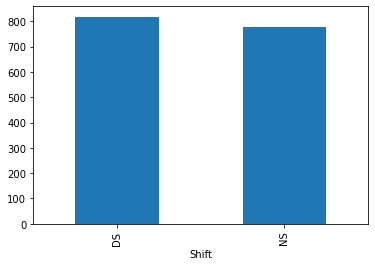

In [22]:
print(varshift)
varshift.plot(kind='bar')

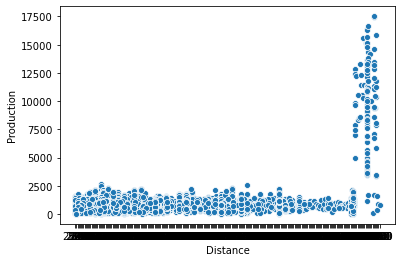

In [23]:
sns.scatterplot(data=new_data, x='Distance', y='Production')

In [24]:
new_data[new_data['Ritation']>=100]

,HaulingEq,Date,Shift,Material,Distance,Ritation,Capacity,HaulDuration1,HaulDuration2,HaulDuration3,HaulDuration4,Production
9516,HBM999,2020-11-01T00:00:00.000000000,DS,COAL - ROM,42700,233,30,0,0,0,0,6990
9517,HBM999,2020-11-01T00:00:00.000000000,NS,COAL - ROM,42700,328,30,0,0,0,0,9840
9518,HBM999,2020-11-02T00:00:00.000000000,DS,COAL - ROM,42700,262,30,0,0,0,0,7860
9519,HBM999,2020-11-02T00:00:00.000000000,NS,COAL - ROM,42700,428,30,0,0,0,0,12840
9520,HBM999,2020-11-03T00:00:00.000000000,DS,COAL - ROM,42700,247,30,0,0,0,0,7410
9521,HBM999,2020-11-03T00:00:00.000000000,NS,COAL - ROM,42700,165,30,0,0,0,0,4950
9522,HBM999,2020-11-04T00:00:00.000000000,DS,COAL - ROM,42700,412,30,0,0,0,0,12360
9523,HBM999,2020-11-04T00:00:00.000000000,NS,COAL - ROM,42700,321,30,0,0,0,0,9630
9524,HBM999,2020-11-05T00:00:00.000000000,DS,COAL - ROM,65950,406,30,0,0,0,0,12180
9525,HBM999,2020-11-05T00:00:00.000000000,NS,COAL - ROM,42800,278,30,0,0,0,0,8340


Menemukan anomali pada hauler HBM999 yang mana HBM999 ini mewakili banyak alat namun hanya terekam sebagai satu alat

In [25]:
new_data = new_data[new_data.HaulingEq !='HBM999']

Shift
DS    703.159884
NS    685.572420
Name: Production, dtype: float64


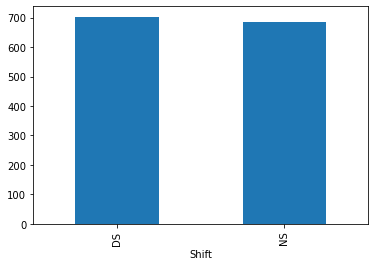

In [26]:
varshift = new_data.groupby('Shift').Production.apply(np.mean)
print(varshift)
varshift.plot(kind='bar')

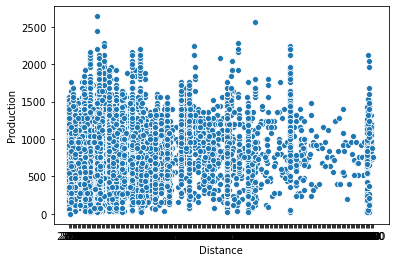

In [27]:
sns.scatterplot(data=new_data, x='Distance', y='Production')

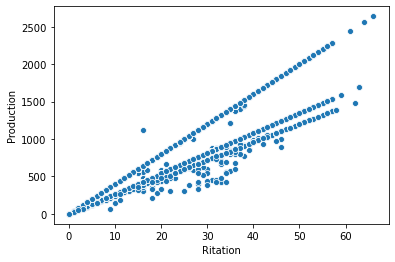

In [28]:
sns.scatterplot(data=new_data, x='Ritation', y='Production')

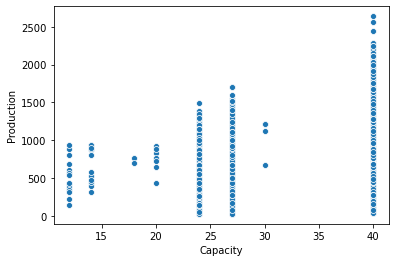

In [29]:
sns.scatterplot(data=new_data, x='Capacity', y='Production')

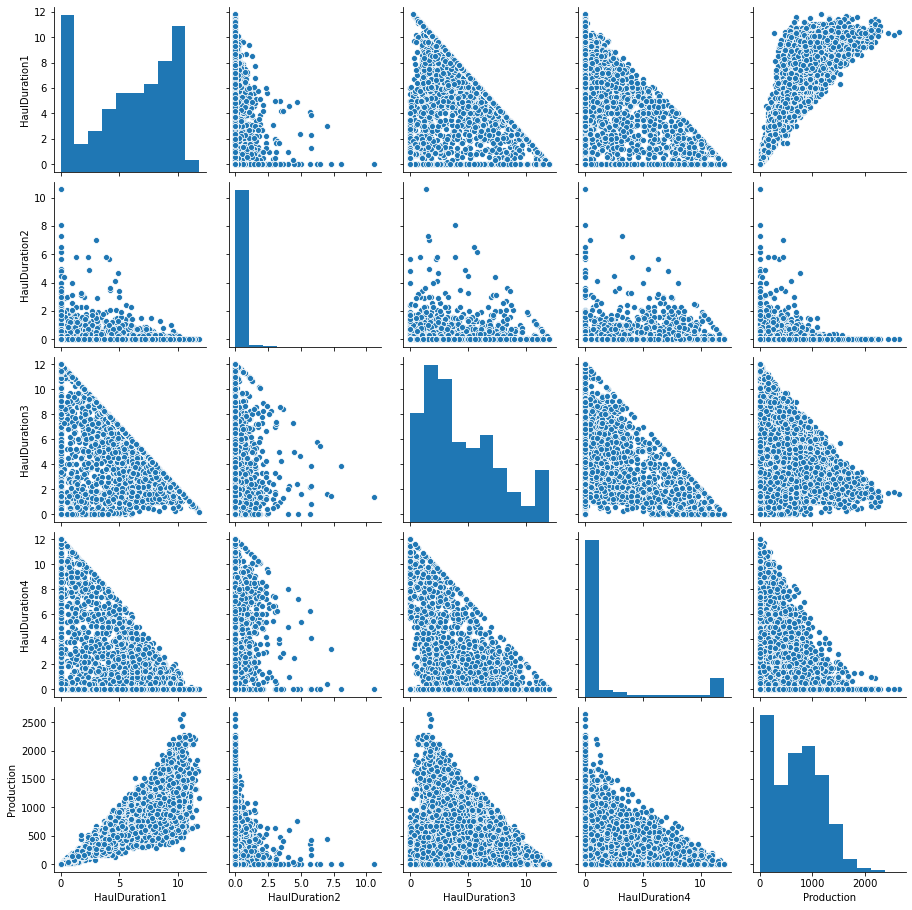

In [30]:
sns.pairplot(new_data.iloc[:,7:])

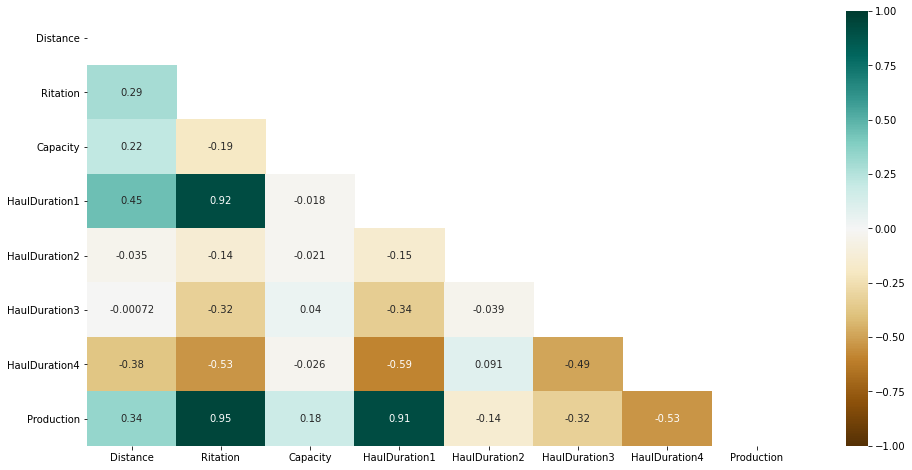

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_data = new_data[new_data.columns[4:]].astype('float32')
mask = np.triu(np.ones_like(plot_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(plot_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [32]:
from sklearn.cluster import KMeans

In [33]:
plot_data.head(5)

,Distance,Ritation,Capacity,HaulDuration1,HaulDuration2,HaulDuration3,HaulDuration4,Production
0,2300.0,26.0,40.0,8.0,0.0,2.9,1.1,1040.0
1,2300.0,18.0,40.0,5.0,0.0,1.0,6.0,720.0
2,0.0,0.0,NaN,0.0,0.0,0.0,12.0,0.0
3,2300.0,16.0,40.0,6.3,0.7,4.9,0.1,640.0
4,2800.0,17.0,40.0,8.0,0.0,4.0,0.0,680.0


In [43]:
X = plot_data.loc[:,['Distance','Ritation','HaulDuration1','Production']]

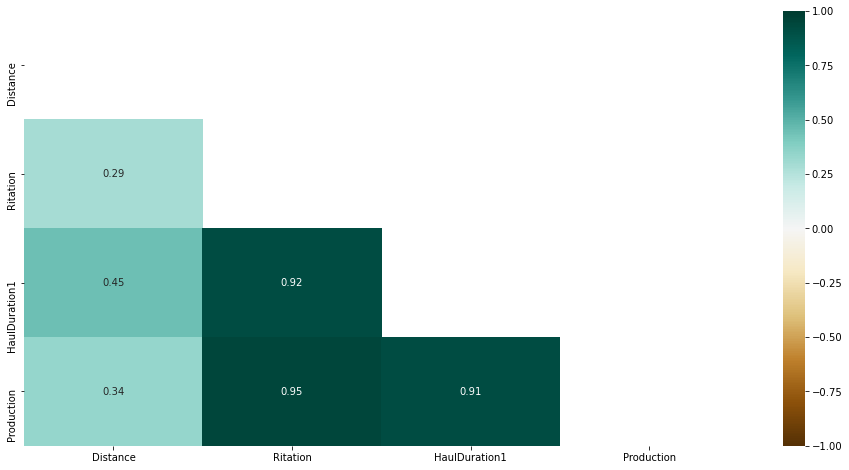

In [44]:
plt.figure(figsize=(16,8))
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [45]:
values = X.values

# Clustering K-Means

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [53]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(scaled)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

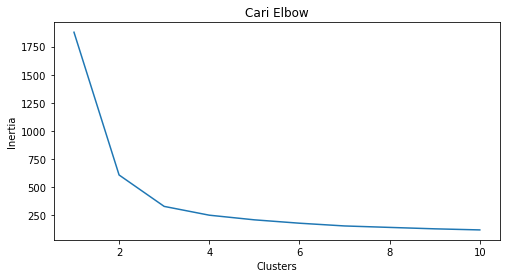

In [54]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [194]:
km3 = KMeans(n_clusters=3).fit(scaled)
X['Labels'] = km3.labels_

(array([2556.,    0.,    0.,    0.,    0., 3510.,    0.,    0.,    0.,
        4304.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

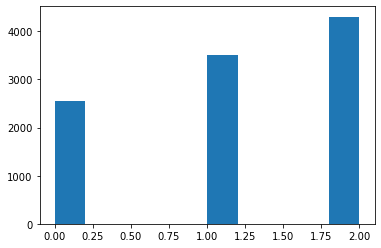

In [195]:
plt.hist(X['Labels'])

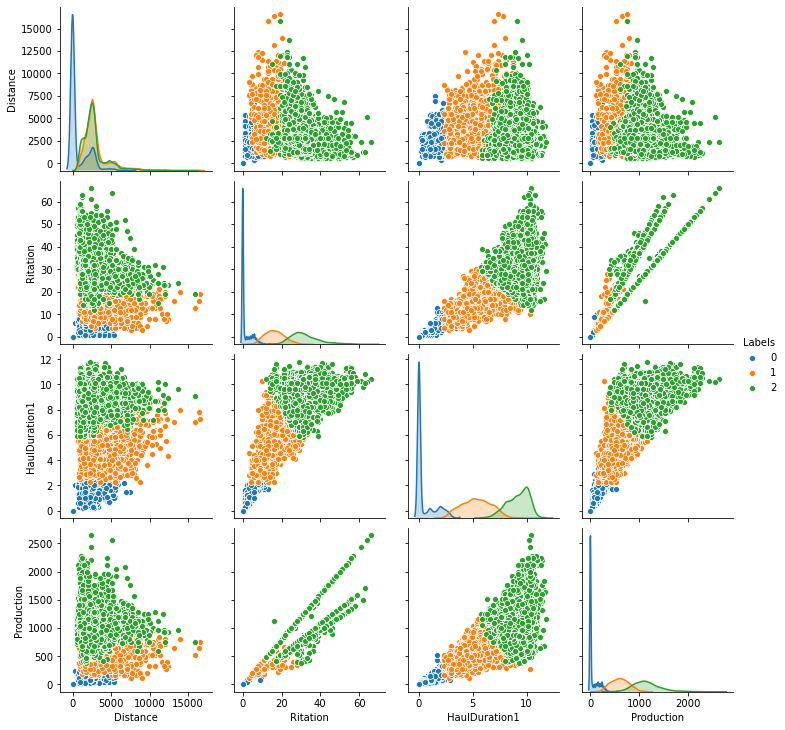

In [197]:
sns.pairplot(X, hue='Labels').savefig('klaster.png')

In [199]:
n_labels = X['Labels'].value_counts()

In [205]:
print('Data berlabel 0 adalah',n_labels[0]/n_labels.sum()*100,'% dari total data')

Data berlabel 0 adalah 24.6480231436837 % dari total data
